In [2]:
import pandas as pd

import dms_variants
import dms_variants.codonvarianttable
from dms_variants.constants import CBPALETTE
import dms_variants.plotnine_themes

from plotnine import *

_ = theme_set(dms_variants.plotnine_themes.theme_graygrid())

In [3]:
import os
os.chdir('../')

In [9]:
noAb_samples = ['libA', 'libB']
var_counts = []

for sample in noAb_samples:
    for rep in range(1,3):
        var_count_df = pd.read_csv(f'results/variant_counts/{sample}_221108_1_no-VEP_control_{rep}.csv')
        var_count_df['sample'] = f'{sample}_{rep}'
        var_counts.append(var_count_df)

var_counts[1]

,barcode,count,codon_substitutions,aa_substitutions,variant_call_support,sample
0,ATAACACAAAAAAGTA,123924,AAG297ATA,K297I,4,libA_2
1,AGCCTATTAGGATTCG,44364,NaN,NaN,5,libA_2
2,TATCTACCTAACGAAA,42474,AGA111AGC GTG366ATG CGA402TCA,R111S V366M R402S,5,libA_2
3,AAAAATCTGAGACAAA,37284,AAA46GCA ATC301GTG GAG409ATG,K46A I301V E409M,4,libA_2
4,GTCCCGCATCAGTTTC,36195,CAG63GTG AAA154AAT AGG318ATG,Q63V K154N R318M,5,libA_2
...,...,...,...,...,...,...
66580,TTTTTTCATAAGCGGG,0,CTT34ATT AAA46GCA AAA102CAT TTG403TTT GTA421AA...,L34I K46A K102H L403F V421N N516R,3,libA_2
66581,TTTTTTCATGCATAGA,0,AAT25AAA GAA69TCA TTT98ATA CAA216ACA AGA326AAA...,N25K E69S F98I Q216T R326K S377C T435S S461D,5,libA_2
66582,TTTTTTTCAAAATAAC,0,ACG206AAT GTG509GCA,T206N V509A,2,libA_2
66583,TTTTTTTCTAAGGATC,0,ACA49GAA TTA176AAT GCA549TCA,T49E L176N A549S,3,libA_2


In [14]:
df = pd.concat([var_counts[2], var_counts[3]])
df = df.pivot(index='barcode', columns='sample', values='count').reset_index().rename_axis(None, axis=1)
df

,barcode,libB_1,libB_2
0,AAAAAAAAAACTACGA,0,0
1,AAAAAAAAAAGACACT,0,0
2,AAAAAAAAAAGTACAG,0,0
3,AAAAAAAAAATCACGG,0,0
4,AAAAAAAAAGAAGTGG,6,10
...,...,...,...
85133,TTTTTTTAAGACAAAC,0,0
85134,TTTTTTTAGGCAATAA,0,0
85135,TTTTTTTATCTTAAAC,13,10
85136,TTTTTTTTCCACTAAA,0,0


In [12]:
df = df.loc[df['libB_1'] < 50000]

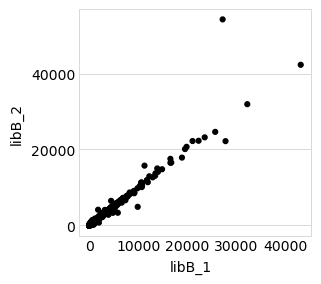

In [15]:
p = (
    ggplot(
    df,
    aes(x='libB_1', y='libB_2')) + 
geom_point() + 
# annotate('text', 
#          x=((df[f'{condition}_{pair[0]}'].max())*0.16), 
#          y=((df[f'{condition}_{pair[1]}'].max())*0.9), 
#          label=f'r2={str(r2)[0:5]}', size=10) +
theme(figure_size=(3, 3),
     panel_grid_major_x=element_blank(),
     ))

# plotfile = os.path.join(figs_dir, f"{condition}_{pair[0]}_{pair[1]}_corr.png")
# print(f'saving plot to {plotfile}')
# p.save(plotfile, verbose=False)

_ = p.draw()

In [ ]:
def pivot_counts(df, condition):
    counts_by_condition = (
        df.loc[df['condition'] == condition]
        .pivot(index='barcode', columns='sample', values='count')
        .reset_index()
        .rename_axis(None, axis=1)
    )
    
    return counts_by_condition


def plot_correlates(df, condition, replicate_pairs, figs_dir):
    
    for pair in replicate_pairs:
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
            df[f'{condition}_{pair[0]}'], df[f'{condition}_{pair[1]}'])
        
        r2 = r_value**2

        p = (
            ggplot(
            df,
            aes(x=f'{condition}_{pair[0]}', y=f'{condition}_{pair[1]}')) + 
        geom_point() + 
        annotate('text', 
                 x=((df[f'{condition}_{pair[0]}'].max())*0.16), 
                 y=((df[f'{condition}_{pair[1]}'].max())*0.9), 
                 label=f'r2={str(r2)[0:5]}', size=10) +
        theme(figure_size=(3, 3),
             panel_grid_major_x=element_blank(),
             ))
        
        plotfile = os.path.join(figs_dir, f"{condition}_{pair[0]}_{pair[1]}_corr.png")
        print(f'saving plot to {plotfile}')
        p.save(plotfile, verbose=False)

        _ = p.draw()